In [1]:
library(scatterplot3d)

# Load data

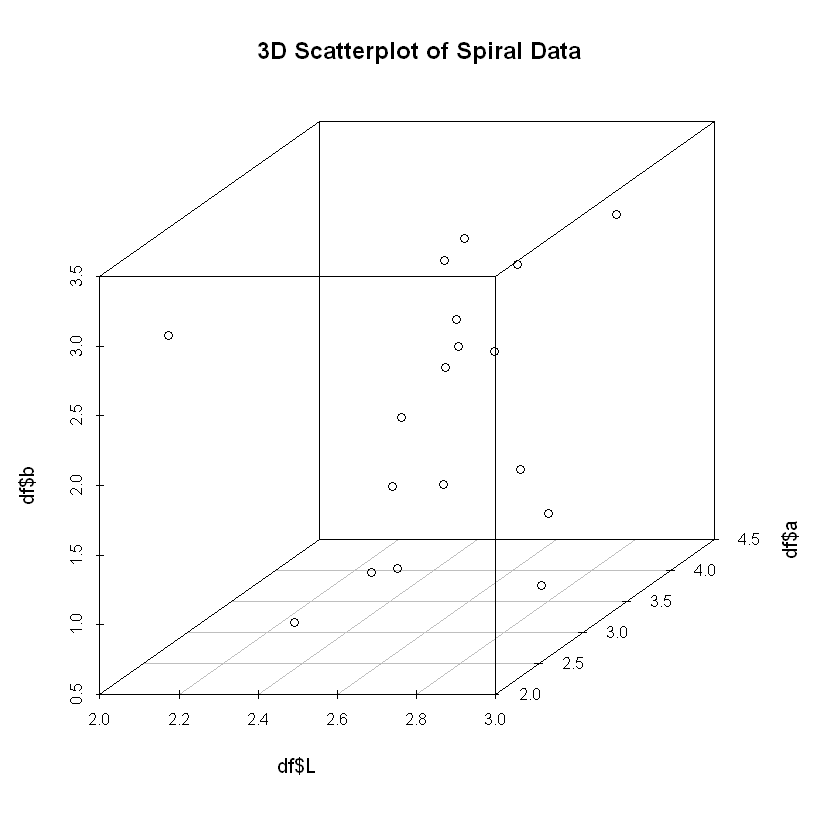

In [2]:
df = read.csv('spiral.csv', sep=';')
scatterplot3d(df$L, df$a, df$b, main="3D Scatterplot of Spiral Data")

# Center data

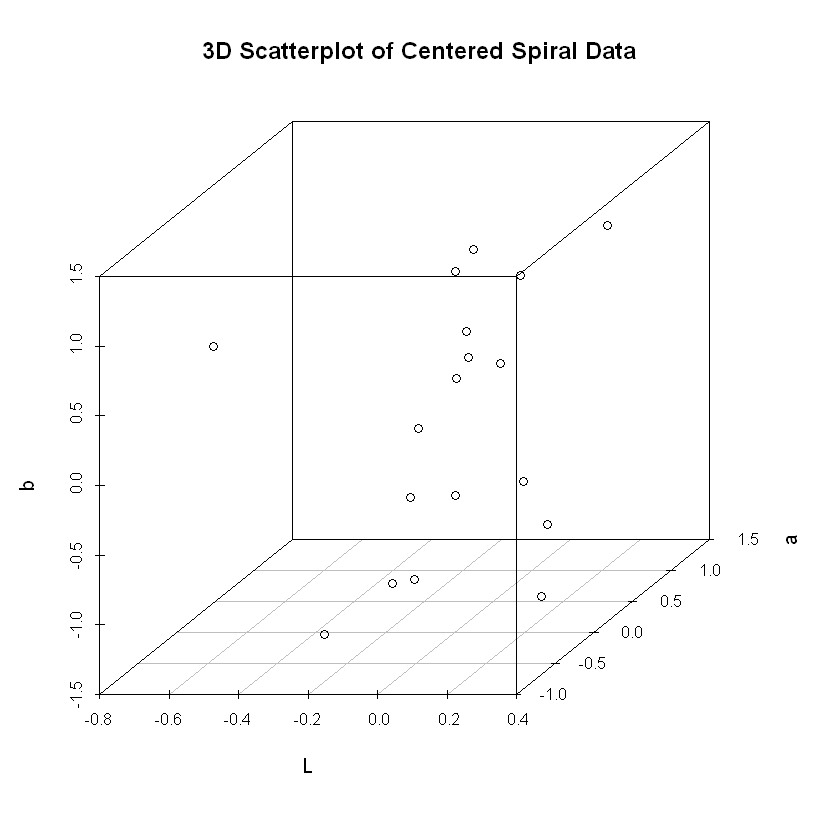

In [3]:
xvarCol = 3:5
X = data.matrix(df[xvarCol])

m = apply(X,2,mean)
s = apply(X,2,sd)

Xc = sweep(X,2,m,"-")
rownames(Xc) = df$Samples

scatterplot3d(Xc, main="3D Scatterplot of Centered Spiral Data")

# Standardizing

Only applicable if the data of the variables strongly differ in variance. When minimizing a sum of squares, the high variance variable will dominate the solution. It is not applicable to this dataset.

To normalize the variable, simply calculate the z-score with $z = \frac{x - \bar{x}}{s}$. 

# Normalizing

The combination of centering and standardizing is called normalizing.

In [4]:
Xcs = sweep(Xc,2,s,"/")
Xcs

L,a,b
-0.443016958,0.76821601,0.15882545
0.633269640,-0.61457281,1.69727879
1.416023530,-0.18357370,-0.82239282
-0.540861195,0.04988416,-0.05922305
-0.491939077,1.12738194,0.23150829
-0.100562132,1.68408913,0.77662955
0.486503286,0.24742542,0.44955679
0.388659049,-1.58432082,-0.88296184
1.024646585,1.84571380,1.16427133
0.780035994,0.71434113,-1.71881444


# Calculate the first principal component (PC1)

Steps to calculate PC1:

 1. The first principal component will be a vector $p_1' = \begin{bmatrix} \beta_1, \beta_2, \beta_3 \end{bmatrix}$.
 2. Project all the samples in the dataset orthogonally onto the vector $p_1'$.
 3. Find the length of the line segment between the sample and the orthogonally projection onto the vector $p_1'$.
 4. Calculate the sum of squares of the line segments.
 5. Determine $\beta_1, \beta_2, \beta_3$ in such a way that the sum of squares is minimized.

# Determining $\beta_1, \beta_2, \beta_3$ of PC1

As a notation, $X_c'$ will denote the transponse of $X_c$. To calculate the covariance matrix, we can determine:

$$ S = \frac{X_c'X_c}{N-1}. $$

The variances are on the main diagonal, and the covariances on the off-diagonal elements.

In [5]:
t(Xc) %*% Xc / (nrow(Xc) - 1)

,L,a,b
L,0.04178203,0.01975752,-0.01214052
a,0.01975752,0.31007712,0.14223203
b,-0.01214052,0.14223203,0.68145752


This can be done quickly with `cov(...)`:

In [6]:
cov(Xc)

,L,a,b
L,0.04178203,0.01975752,-0.01214052
a,0.01975752,0.31007712,0.14223203
b,-0.01214052,0.14223203,0.68145752


The first principle component PC1, vector $p_1' = \begin{bmatrix} \beta_1, \beta_2, \beta_3 \end{bmatrix}$ is the eigenvector with the highest eigenvalue of the covariance matrix. 

In [7]:
eigen(cov(Xc))

eigen() decomposition
$values
[1] 0.72970941 0.26416200 0.03944526

$vectors
             [,1]       [,2]        [,3]
[1,] -0.007505357 -0.1011221  0.99484571
[2,]  0.320680456 -0.9425723 -0.09338946
[3,]  0.947157703  0.3183267  0.03950223


This means that the vector for PC1 is $\begin{bmatrix} -0.0075, -0.1011,  0.9948 \end{bmatrix}$.

In [8]:
p1 = eigen(cov(Xc))$vectors[,1]
p2 = eigen(cov(Xc))$vectors[,2]
p3 = eigen(cov(Xc))$vectors[,3]

# Finding PC2

The second principle component PC2 is orthogonal to PC1. Also, the second principle component is the eigenvector with the second highest value of the covariance matrix, vector $p_2' = \begin{bmatrix} 0.3206, -0.9425, -0.0933 \end{bmatrix}$.

# Rotationary ambivalence

Because there is another vector that is orthogonal to $p_1'$, which is the vector in the opposite direction. Both vectors are correct, and this phenoma is called _rotationary ambivalence_. If you don't like the result, simple change the sign $p := -p$.

In [9]:
p2 = -p2

# Loadings $p$

* Elements in the principle component vector $p$ are also called _loadings_.
* The vectors $p_1$ and $p_2$ are orthogonal to each other, thus they span a plane.
* In the way $p_1$ and $p_2$ are determined, this plane contains the maximed form of information of the samples in the original $v$-dimensional space.
* Then we project the samples in the plane and look at the graph where $p_1$ is the x-axis, and $p_2$ is the y-axis.

# Scores $t$

* Project every samples orthogonal onto the vector $p_1$.
* The distance from the origin $O$ to the orthogonal projection onto $p_1$ is the new x-coordinate of the sample in the $p_1, p_2$-plane.
* These new coordinates are called _Scores_.
* Also do this for $p_2$, and then plot $t_2$ on the y-axis and $t_1$ on the x-axis.

# Calculating scores $t$

For example, project the sample `M17` where $x_c = [-0.16, -0.98, -1.08]$ orthogonal onto $p_1' = [-0.01, 0.32, 0.95]$. The formula for this is:

$$ t = \dfrac{x_c \cdot p_1}{p_1' \cdot p_1} $$

However, the length $l$ of $p_1 = 1$. This means that $p_1' \cdot p_1 = (-0.01) ^2 + 0.32^2 + 0.95^2 = 1$. This simplifies the formula to $t=x_c\cdot p_1$. **(Do note that the multiplication operator $\cdot$ denotes a dot-product between two vectors.)**

In [10]:
Xc[17,] %*% p1

-1.332446


If we do this for all the samples, and plot the scores:

In [11]:
t1 = Xc %*% p1
t2 = Xc %*% p2
t3 = Xc %*% p3

# Score plot

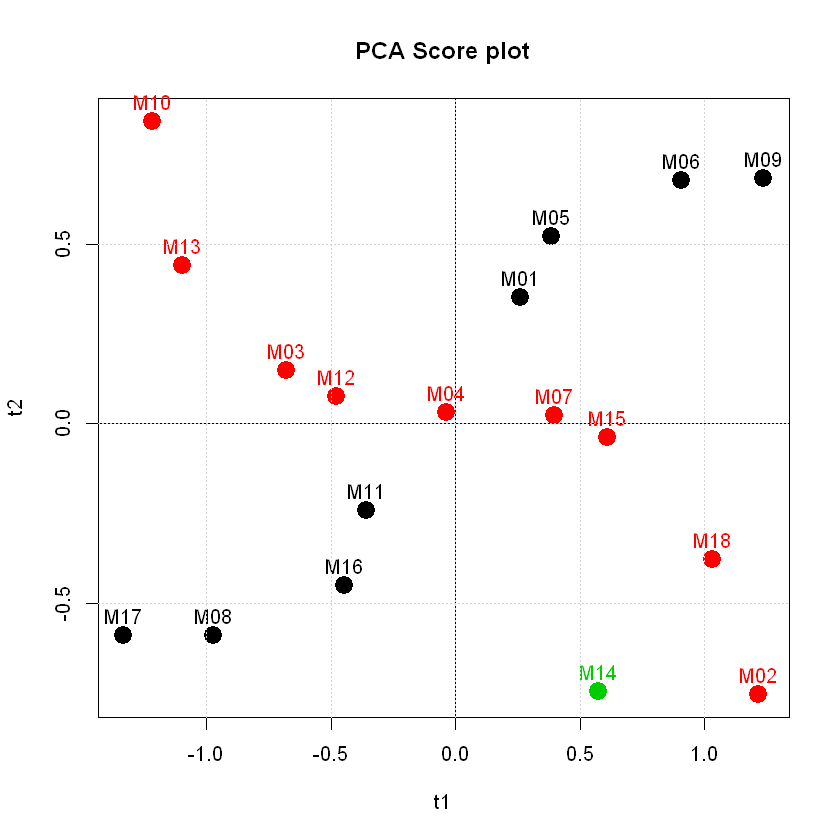

In [12]:
plot(t1, t2, col=df$Spiraal, pch=19, cex=2) 
text(t1, t2, labels=df$Sample, col=df$Spiraal, pos=3, xpd=NA)
abline(h=0,lty=1)
abline(v=0,lty=1)
title(main='PCA Score plot')
grid()

# Loading plot

The loadings $p_1$ and $p_2$ show the most important structure in the dataset. They determine where the samples will end in the score plot: $t = x_c \cdot p$. This means that for $p_1' = [-0.01, 0.32, 0.95 ]$:

 * the variable $L$ is not important.
 * the variable $a$ has a positive contribution.
 * the variable $b$ also has a positive contribution and is the most important one.
 
The loadings plot of $p_1$ and $p_2$ determines the position of the samples in the score plot.

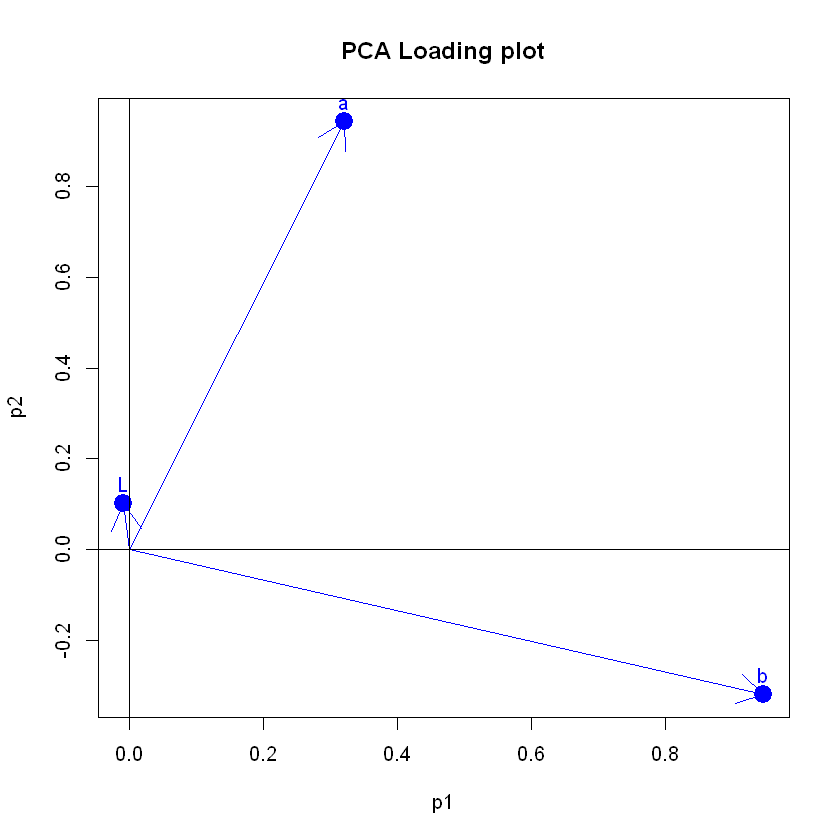

In [13]:
plot(p1,p2,pch=19,cex=2,col="blue")
arrows(0,0,p1,p2,col="blue") 
text(p1,p2,labels=colnames(X),pos=3,col="blue",xpd=NA)
abline(h=0,lty=1)
abline(v=0,lty=1)
title(main="PCA Loading plot")

# Bi-plot

The most informative plot is the combination of the score plot and the loading plot. This is called a bi-plot. Usually the loadings coefficients are very small numbers, compared to the scores. To display them properly into the score plot, they have to be rescaled by a positive constant. This is allowed, because the underlying relationship is what matters. 

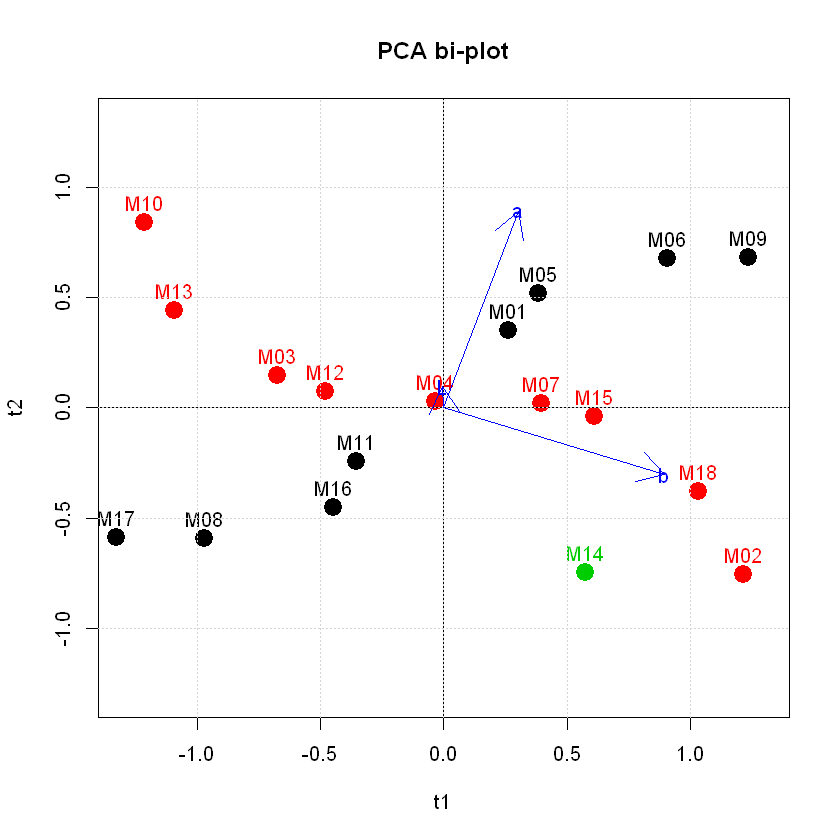

In [14]:
# scores plot
lim = max(t1) * 1.05
plot(t1, t2, col=df$Spiraal, pch=19, cex=2, ylim=c(-lim,lim), xlim=c(-lim,lim)) 
text(t1, t2, labels=df$Sample, col=df$Spiraal, pos=3, xpd=NA)
abline(h=0,lty=1)
abline(v=0,lty=1)
title(main='PCA bi-plot')
grid()

# loading plot
loadingScale = max(p1)
arrows(0,0,p1*loadingScale,p2*loadingScale,col="blue") 
text(p1*loadingScale,p2*loadingScale,labels=c('L', 'a', 'b'), col='blue')

# PCA as a model

In [15]:
# Calculate the trace of a matrix M.
trace = function(M) { (sum(diag(M))) }

# Calculate the variance of a matrix M.
matrix.var = function(M) { (trace(t(M) %*% M) / (nrow(M) * ncol(M))) }

# Calculate the standard deviation of a matrix M.
matrix.sd  = function(M) { (sqrt(matrix.var(M))) }

# Calculate the mean for every row of a matrix M.
rowMeans = function(M) { (rowSums(M) / ncol(M)) }

# Calculate the mean for every column of a matrix M.
colMeans = function(M) { (colSums(M) / nrow(M)) }

We want to write PCA as a model in the form of:

$$ X_c = \hat{X}_c + E $$

where $E$ is the error term, and $\hat{X}_c$ is explained in the next paragraph:

First we set the error matrix $E_0 = X_c$, because we haven't extracted any data from the error matrix yet. Then we calculate $PC1$, and subtract this from the error matrix $E_0$, so we get $E_1 = E_0 - t_1 \cdot p_1'$. Then we keep doing this, and calculate any $PC_n$, and then subtract that data from the previous error matrix: $E_{n} = E_{n-1} - t_n \cdot p_n'$.

In [16]:
E0 = Xc
trace(t(E0) %*% E0) / (nrow(E0) * ncol(E0))
matrix.var(Xc)

[1] 0.3253034

[1] 0.3253034

In [17]:
t1 = E0 %*% p1
E1 = E0 - t1 %*% t(p1)
rownames(E1) = rownames(E0)

In [18]:
matrix.var(E1)

[1] 0.09558006

In [19]:
t2 = E1 %*% p2
E2 = E1 - t2 %*% t(p2)
rownames(E2) = rownames(E0)

In [20]:
matrix.var(E2)

[1] 0.01241795

In [21]:
t3 = E2 %*% p3
E3 = E2 - t3 %*% t(p3)
rownames(E3) = rownames(E0)

In [22]:
matrix.var(E3)

[1] 3.548665e-32

Now all the data is in the model, and the error matrix is essentially zero.

# Scree plot

A scree plot can tell you how many PC's you should add to the model. The limit value can be found with:

$$ l = \dfrac{\textrm{trace}(Covariance\ matrix)}{v}$$

where $v$ is number of variables.

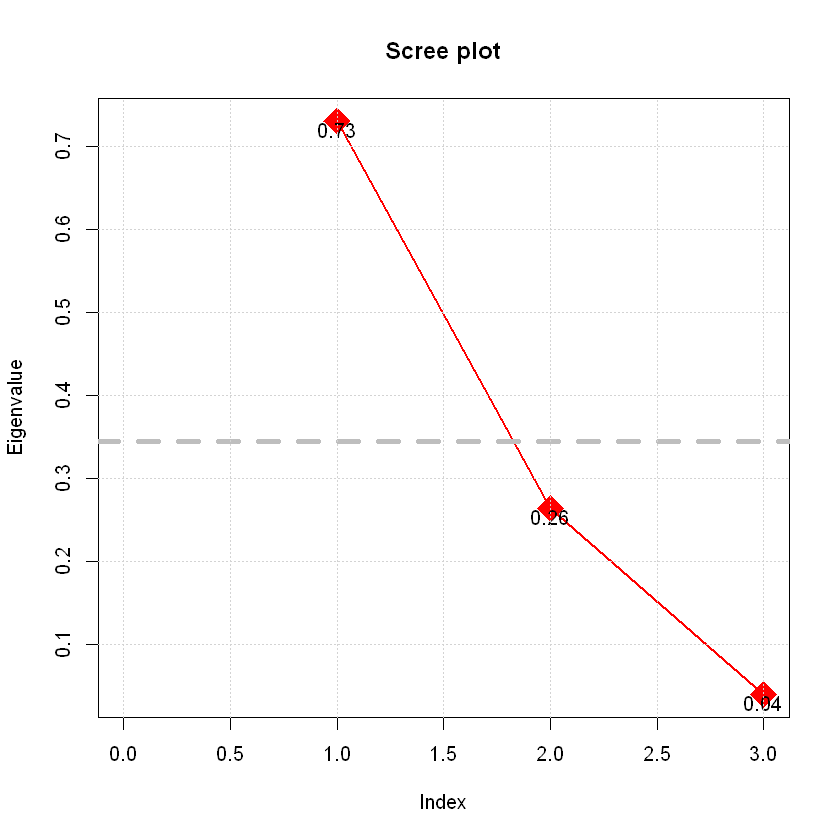

In [23]:
lambdas = eigen(cov(Xc))$values
lambdas = sort(lambdas, decreasing=TRUE)
plot(lambdas, type='o', pch=18, col='red', cex=3, lwd=2
     , main="Scree plot", xlab="Index", ylab="Eigenvalue",
    xlim=c(0, length(lambdas)))
lim = trace((cov(Xc))) / length(lambdas)
abline(h=lim, lt='dashed', lwd=4, col='gray')
text(lambdas - 0.01, labels=round(lambdas,2))
grid()

Looking at the scree plot, we can see that we would have to add 1 PC to our model.

# Total variance / explained variance

We can calculate the variance of a matrix $\mathbf{M}$ with the following formula:

$$ \textrm{matrix.var}(\mathbf{M}) = \dfrac{\sum\limits_{i=1}^N \sum\limits_{j=1}^v e^2_{ij}}{N\cdot v} = \dfrac{\textrm{trace}(E^T\cdot E)}{N\cdot v} $$

In [24]:
E0

L,a,b
-0.0905555556,0.42777778,0.13111111
0.1294444444,-0.34222222,1.40111111
0.2894444444,-0.10222222,-0.67888889
-0.1105555556,0.02777778,-0.04888889
-0.1005555556,0.62777778,0.19111111
-0.0205555556,0.93777778,0.64111111
0.0994444444,0.13777778,0.37111111
0.0794444444,-0.88222222,-0.72888889
0.2094444444,1.02777778,0.96111111
0.1594444444,0.39777778,-1.41888889


In [25]:
matrix.var(E0)

[1] 0.3253034

In [26]:
matrix.var(E1)

[1] 0.09558006

In [27]:
matrix.var(E2)

[1] 0.01241795

In [28]:
summary(prcomp(Xc))

Importance of components:
                          PC1    PC2     PC3
Standard deviation     0.8542 0.5140 0.19861
Proportion of Variance 0.7062 0.2556 0.03817
Cumulative Proportion  0.7062 0.9618 1.00000

In [29]:
no.of.pcs = 0:3
total.var = c(matrix.var(E0), matrix.var(E1), matrix.var(E2), 0)
rest.var = c(1, matrix.var(E1) / matrix.var(E0), matrix.var(E2) / matrix.var(E0), 0)
explained.var = 1 - rest.var
var.per.pc = c(0, diff(explained.var))
df.vars = data.frame(no.of.pcs, total.var, rest.var, explained.var, var.per.pc)
colnames(df.vars) = c("PCs in model", "Total variance", "Rest variance in %", 
                      "Explained variance in %", "Explained variance per PC")
df.vars

PCs in model,Total variance,Rest variance in %,Explained variance in %,Explained variance per PC
0,0.32530340,1.00000000,0.0000000,0.00000000
1,0.09558006,0.29381822,0.7061818,0.70618178
2,0.01241795,0.03817345,0.9618266,0.25564477
3,0.00000000,0.00000000,1.0000000,0.03817345


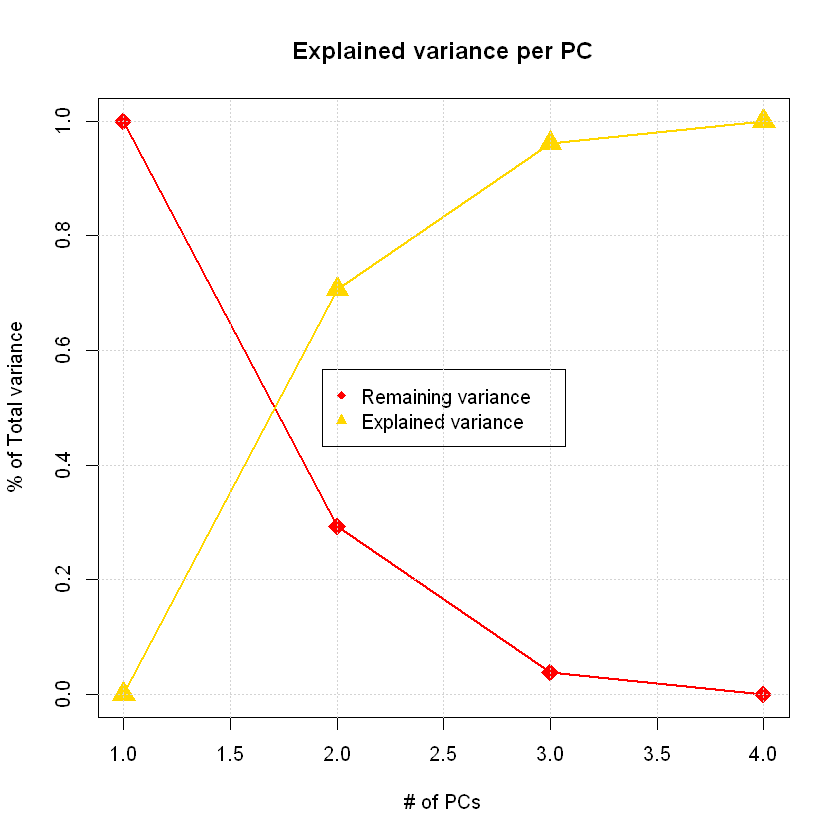

In [30]:
plot(df.vars[,3], type='o', col='red', lwd=2, pch=18, cex=2
     , main="Explained variance per PC", ylab="% of Total variance", xlab="# of PCs")
lines(df.vars[,4], type='o', col='gold', pch=17, lwd=2, cex=2)
legend("center", col=c('red', 'gold')
       , legend=c('Remaining variance', 'Explained variance'), pch=c(18, 17))
grid()

We can look at the final error matrix to spot any outliers:

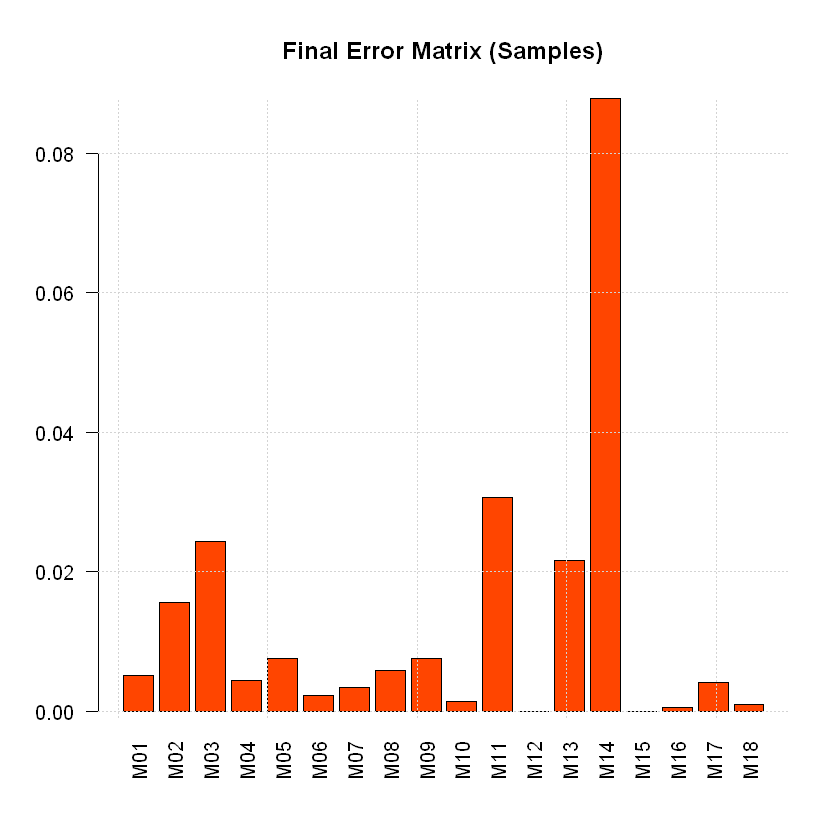

In [31]:
rownames(E2) = df$Sample
barplot(rowMeans(E2^2), las=2, col='orangered1')
grid()
title(main="Final Error Matrix (Samples)")

Here we can see that `M14` is probably an outlier. 

The same can be done for the variables:

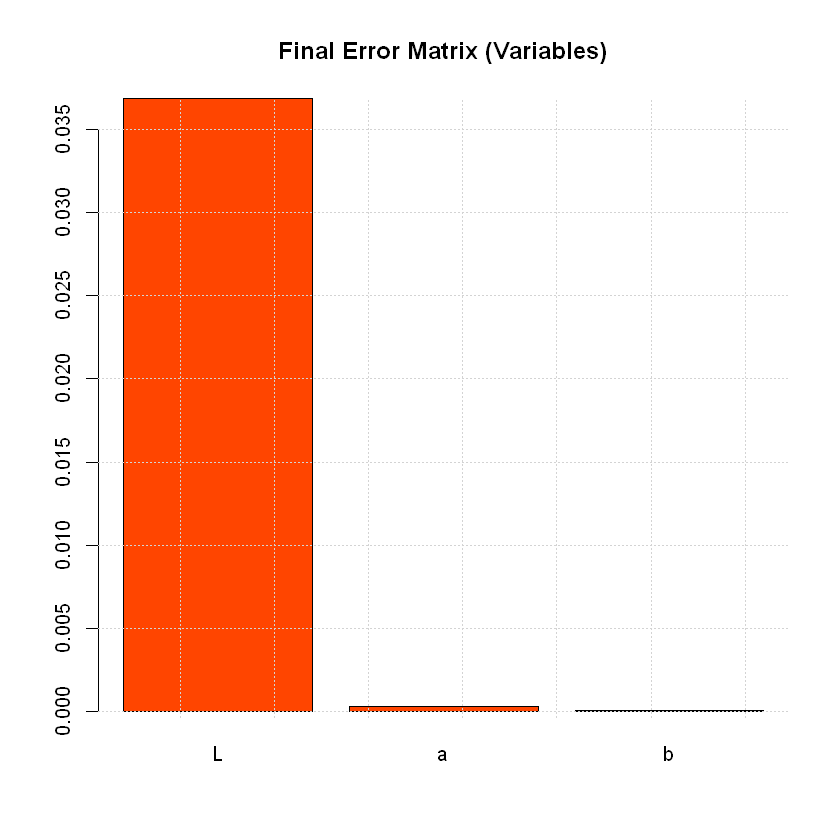

In [32]:
tE2 = t(E2)
barplot(colMeans(E2^2), col='orangered1')
grid()
title(main="Final Error Matrix (Variables)")

Here we can see that $L$ holds the most of the errors, but if we look at the loading plot, we can see that $L$ barely has any influence, it is mostly decided by $a$ and $b$.

We can also look at the variance of the error matrix as we are adding more principle components. First we look at the sample variances:

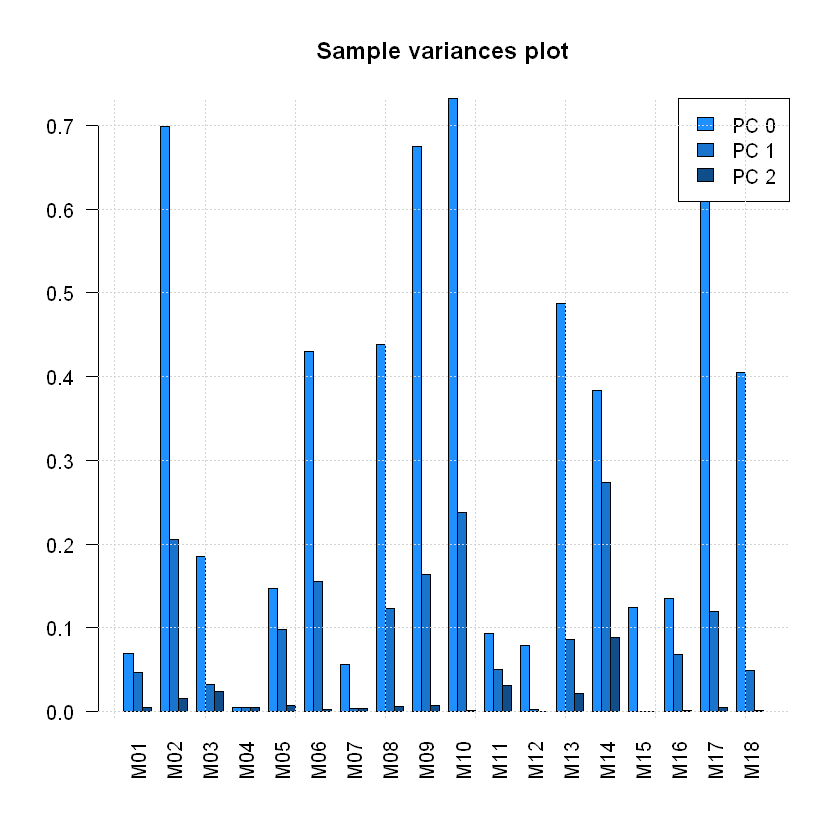

In [33]:
sample.vars = data.frame(
    PC1=rowMeans((E0)^2),
    PC2=rowMeans((E1)^2),
    PC3=rowMeans((E2)^2)
)

colors = c('dodgerblue1', 'dodgerblue3', 'dodgerblue4')
rownames(sample.vars) = df$Sample
barplot(t(sample.vars), las=2, beside=T, main="Sample variances plot", col=colors)
legend("topright", legend=c("PC 0", "PC 1", "PC 2"), fill=colors)
grid()

And likewise we can do the same for the variable variances:

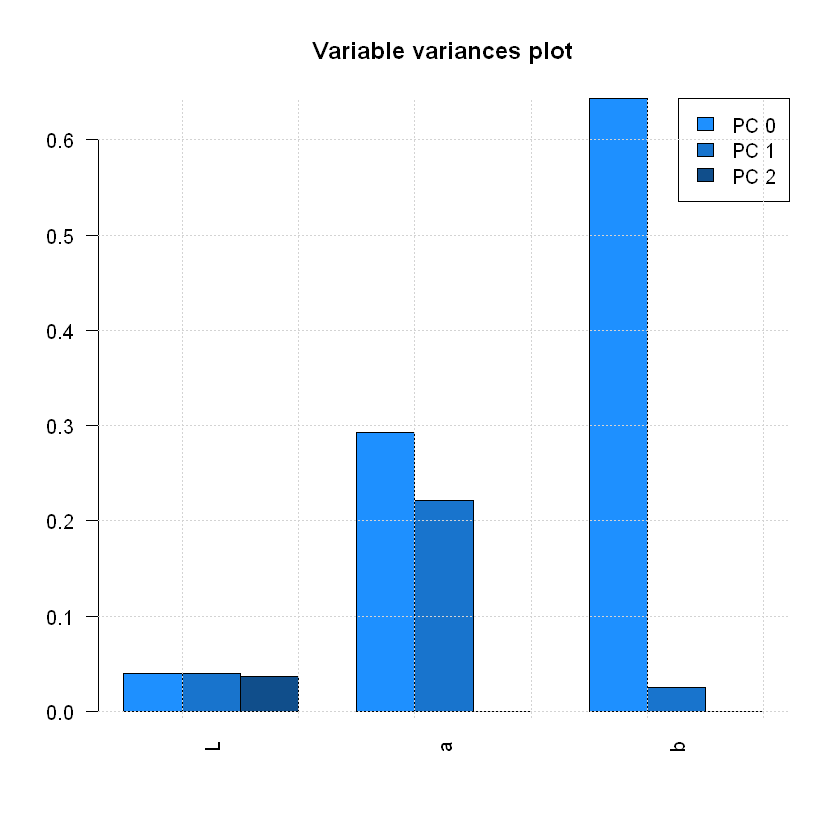

In [34]:
variable.vars = data.frame(
    PC1=colMeans((E0)^2),
    PC2=colMeans((E1)^2),
    PC3=colMeans((E2)^2)
)

barplot(t(variable.vars), las=2, beside=T, main="Variable variances plot", col=colors)
legend("topright", legend=c("PC 0", "PC 1", "PC 2"), fill=colors)
grid()

In [35]:
help(grid)

The data that was originally in $X_c$:

In [36]:
Xc

L,a,b
-0.0905555556,0.42777778,0.13111111
0.1294444444,-0.34222222,1.40111111
0.2894444444,-0.10222222,-0.67888889
-0.1105555556,0.02777778,-0.04888889
-0.1005555556,0.62777778,0.19111111
-0.0205555556,0.93777778,0.64111111
0.0994444444,0.13777778,0.37111111
0.0794444444,-0.88222222,-0.72888889
0.2094444444,1.02777778,0.96111111
0.1594444444,0.39777778,-1.41888889


Is now expressed as a linear combination of the principle components with an added error term:

 $$ X_c = t_1 \cdot p_1' + t_2 \cdot p_2' + E_2 $$

In [37]:
t1 %*% t(p1) + t2 %*% t(p2) + E2

,L,a,b
M01,-0.0905555556,0.42777778,0.13111111
M02,0.1294444444,-0.34222222,1.40111111
M03,0.2894444444,-0.10222222,-0.67888889
M04,-0.1105555556,0.02777778,-0.04888889
M05,-0.1005555556,0.62777778,0.19111111
M06,-0.0205555556,0.93777778,0.64111111
M07,0.0994444444,0.13777778,0.37111111
M08,0.0794444444,-0.88222222,-0.72888889
M09,0.2094444444,1.02777778,0.96111111
M10,0.1594444444,0.39777778,-1.41888889


# Test

In [38]:
model = prcomp(df[,3:5])
summary(model)

Importance of components:
                          PC1    PC2     PC3
Standard deviation     0.8542 0.5140 0.19861
Proportion of Variance 0.7062 0.2556 0.03817
Cumulative Proportion  0.7062 0.9618 1.00000

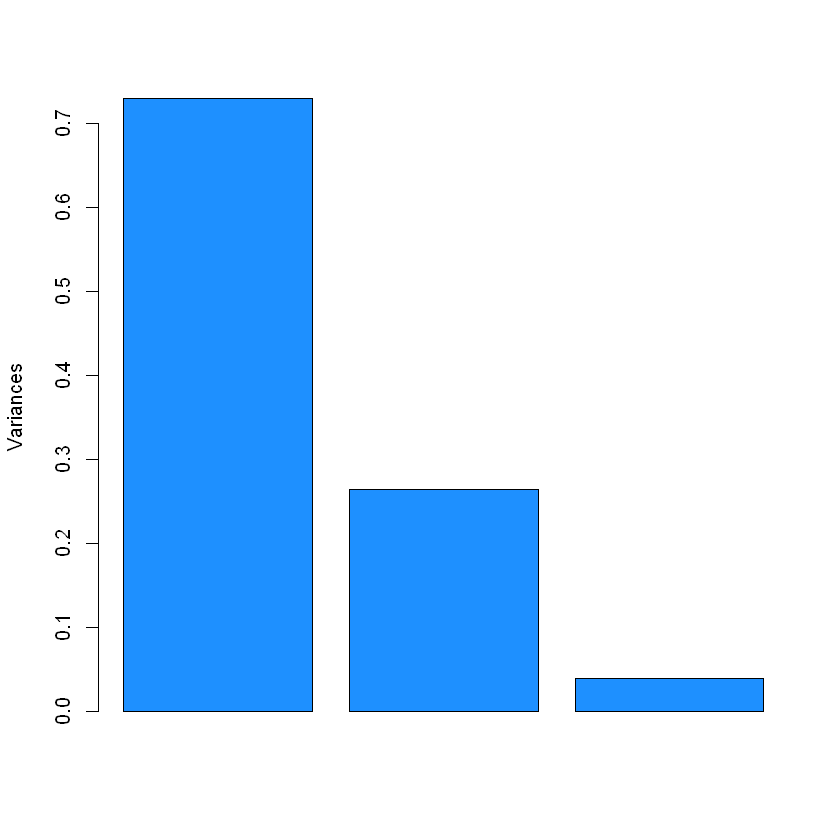

In [39]:
plot(model, main="", col="dodgerblue1")

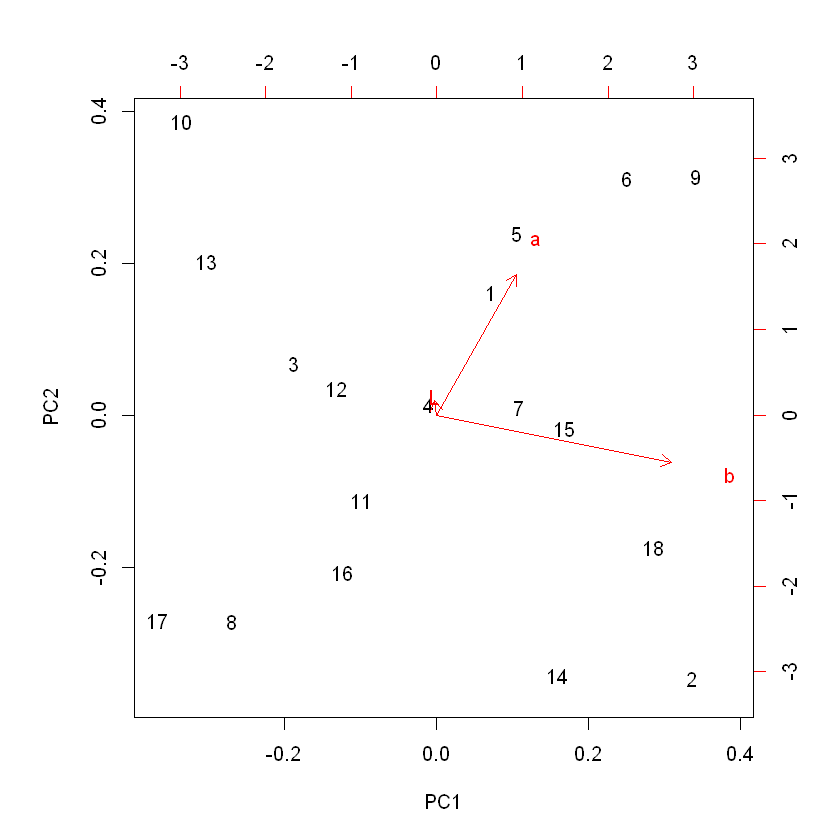

In [40]:
biplot(model)

In [41]:
model

Standard deviations (1, .., p=3):
[1] 0.8542303 0.5139669 0.1986083

Rotation (n x k) = (3 x 3):
           PC1        PC2         PC3
L -0.007505357  0.1011221  0.99484571
a  0.320680456  0.9425723 -0.09338946
b  0.947157703 -0.3183267  0.03950223

In [42]:
loadings(model)

NULL

In [43]:
p1

[1] -0.007505357  0.320680456  0.947157703

In [44]:
p2

[1]  0.1011221  0.9425723 -0.3183267

In [45]:
p3

[1]  0.99484571 -0.09338946  0.03950223